In [1]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import os
os.chdir('../src/')
from data_treatment import update_dataframe
from make_figures import do_SR, do_SR_mesa
from os import listdir
from os.path import isfile, join
%matplotlib inline

datadir = '../data/'
data_files = [f for f in listdir(datadir) if isfile(join(datadir, f))]

df_deltaA =pd.read_json("../data/EDO_DELTA_AMACURO.json",lines=True)
df_Merida =pd.read_json("../data/EDO_MERIDA.json",lines=True)
df_Vargas =pd.read_json("../data/EDO_VARGAS.json",lines=True)
df_MONAGAS =pd.read_json("../data/EDO_MONAGAS.json",lines=True)
df_MIRANDA =pd.read_json("../data/EDO_MIRANDA.json",lines=True)
df_Lara = pd.read_json("../data/EDO_LARA.json", lines=True)


In [4]:
variables = [u'ABSTENCION', u'ACTAS', u'ACTAS ESCRUTADAS', u'ACTAS VALIDAS',
     u'ELECTORES ACTAS TRANSMITIDAS', u'ELECTORES INSCRITOS',
       u'VOTANTES ESCRUTADOS', u'VOTOS ESCRUTADOS', u'VOTOS NULOS',
       u'VOTOS VALIDOS', u'centro', u'estado', u'mesa',u'municipio', u'parroquia','Abstencion_%',
       u'PSUV_%',u'PSUV_N',u'MUD_%',u'MUD_N', u'rescaled_N',u'parroquia_residual',
       u'municipio_residual',u'centro_residual',u'estado_residual',
       u'parroquia_standarised_residual', u'municipio_standarised_residual',u'centro_standarised_residual',
          u'estado_standarised_residual','parroquia_standarised_residual_abstention',]
#DATA PROCESING
#DELTA AMACURO
df_out_deltaAmacuro = update_dataframe(df_deltaA,'LIZETA HERNANDEZ','LARISSA GONZALEZ')[variables]
#MONAGAS
df_out_MONAGAS = update_dataframe(df_MONAGAS,'YELITZE SANTAELLA','GUILLERMO CALL')[variables]
#MERIDA
df_out_Merida = update_dataframe(df_Merida,'JEHYSON GUZMAN','RAMON GUEVARA')[variables]
# VARGAS
df_out_Vargas = update_dataframe(df_Vargas, 'JORGE GARCIA CARNEIRO', 'JOSE MANUEL OLIVARES')[variables]
# MIRANDA
df_out_MIRANDA = update_dataframe(df_MIRANDA, 'HECTOR RODRIGUEZ', 'CARLOS OCARIZ')[variables]
#Lara
df_out_Lara = update_dataframe(df_Lara, 'CARMEN MELENDEZ', 'HENRI FALCON')[variables]


frames = [df_out_Merida,df_out_deltaAmacuro,df_out_MONAGAS,df_out_Vargas,df_out_MIRANDA] #,df_out_Lara]
df_out = pd.concat(frames)
df_out

,ABSTENCION,ACTAS,ACTAS ESCRUTADAS,ACTAS VALIDAS,ELECTORES ACTAS TRANSMITIDAS,ELECTORES INSCRITOS,VOTANTES ESCRUTADOS,VOTOS ESCRUTADOS,VOTOS NULOS,VOTOS VALIDOS,...,rescaled_N,parroquia_residual,municipio_residual,centro_residual,estado_residual,parroquia_standarised_residual,municipio_standarised_residual,centro_standarised_residual,estado_standarised_residual,parroquia_standarised_residual_abstention
0,25,1,1,1,71,71,46,46,0,46.0,...,0.135660,0.177109,0.143837,0.000000,0.065813,0.763740,0.476339,0.000000,0.189251,3.199611
1,222,1,1,1,496,496,274,274,0,274.0,...,0.135660,-0.139734,-0.185817,0.000000,-0.293883,-0.602572,-0.615360,0.000000,-0.845090,2.003013
2,200,1,1,1,638,638,438,438,0,438.0,...,0.135660,-0.050032,-0.092487,0.000000,-0.192048,-0.215750,-0.306285,0.000000,-0.552254,3.683838
3,268,1,1,1,645,645,377,377,1,376.0,...,0.135660,0.061205,0.023248,0.000167,-0.065766,0.263934,0.076989,0.003038,-0.189117,2.405064
4,249,1,1,1,642,642,393,393,0,393.0,...,0.135660,0.123506,0.088067,0.066517,0.004960,0.532589,0.291647,1.212634,0.014263,2.751672
5,286,1,1,1,671,671,385,385,0,385.0,...,0.135660,-0.002859,-0.043407,-0.068063,-0.138495,-0.012327,-0.143747,-1.240806,-0.398256,2.270629
6,15,1,1,1,59,59,44,44,0,44.0,...,0.135660,-0.419487,-0.476881,0.000000,-0.611473,-1.808942,-1.579263,0.000000,-1.758349,4.426383
7,91,1,1,1,290,290,199,199,1,198.0,...,0.135660,-0.154090,-0.375453,0.000000,-0.500802,-0.664478,-1.243371,0.000000,-1.440105,3.786695
8,23,1,1,1,69,69,46,46,0,46.0,...,0.135660,-0.257153,-0.498285,0.000000,-0.634828,-1.108913,-1.650145,0.000000,-1.825508,3.548427
9,145,1,1,1,415,415,270,270,2,268.0,...,0.135660,0.039242,-0.145038,0.042047,-0.249389,0.169223,-0.480316,0.766521,-0.717142,3.352544


# Data:

Results from Merida, Vargas, Monagas and Delta Amacuro.

Data unit is the result in each 'mesa' of an electoral centre. 

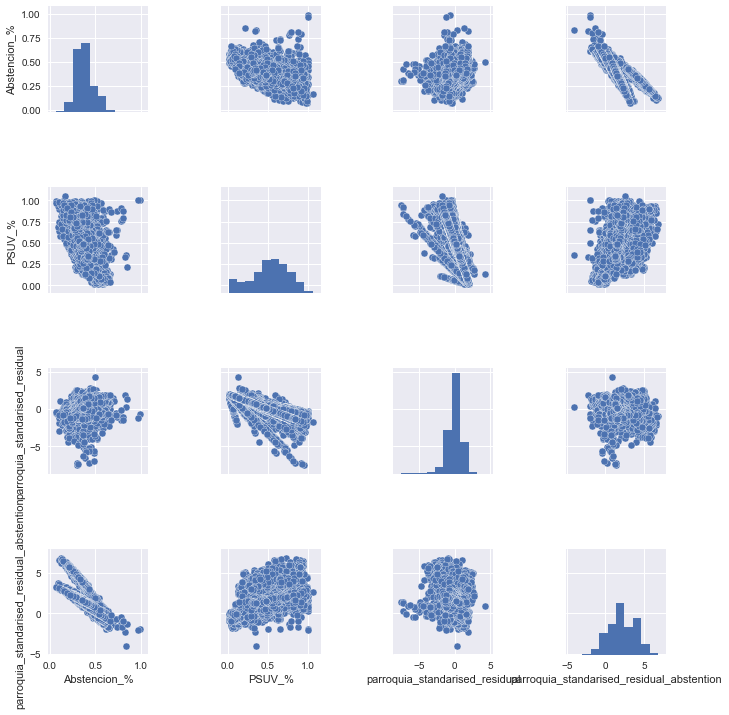

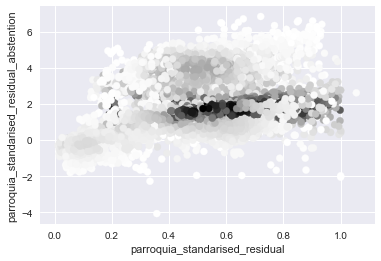

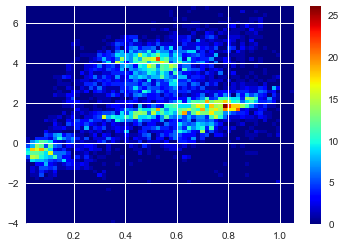

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

sns.pairplot(df_out,vars=['Abstencion_%','PSUV_%','parroquia_standarised_residual','parroquia_standarised_residual_abstention']);

fig, ax = plt.subplots()
xy = np.vstack([df_out['parroquia_standarised_residual'], df_out['parroquia_standarised_residual_abstention']])
z = gaussian_kde(xy)(xy)
ax.scatter(df_out['PSUV_%'], df_out['parroquia_standarised_residual_abstention'], c=z, s=50)
plt.xlabel('parroquia_standarised_residual')
plt.ylabel('parroquia_standarised_residual_abstention')
plt.show()


plt.hist2d(df_out['PSUV_%'],df_out['parroquia_standarised_residual_abstention'], (60, 60), cmap=plt.cm.jet)
plt.colorbar()


# Metrics:

Main metric is the Standarised residuals (SR) or Z-score:


residual_centro = $(1 -\frac{\%Psuv_{mesa}}{\%Psuv_{centro}})$ 

residual_parroquia = $(1 -\frac{\%Psuv_{mesa}}{\%Psuv_{parroquia}})$

$\underline{Standarised Residual}$ = $\frac{residual}{\sigma_{residual}}$ for each level (centro, parroquia, municipio...)

Deviations in favour of PSUV are shown on negative values of SR.

# Standarised residual for each mesa with respect to its centro (only centros with more than 1 'mesa'):

Gaussian distribution, if an external source affects the result in a 'mesa', it will affect the whole 'centro electoral'.

No large relative effect observed (slight tails), this can be our control sample. 


In [ ]:
do_SR(df_out)

# Standarised residual for each mesa with respect to its 'parroquia':

Observing slighly larger tails on the negative side, where PSUV would show larger percentange of votes wrt the result in the parroquia.

All histograms are normalised by number of valid votes in the centre.


In [ ]:
do_SR(df_out)


In [ ]:
do_SR_mesa(df_out)


# RESULTS PER STATE:

Effect changes from state to state:
## MERIDA

Visible asymmetry on tails for the parroquia SR.

In [ ]:
do_SR(df_out_Merida)

In [ ]:
do_SR_mesa(df_out_Merida)

## VARGAS

In [ ]:
do_SR(df_out_Vargas)

In [ ]:
do_SR_mesa(df_out_Vargas)

## MONAGAS

In [ ]:
do_SR(df_out_MONAGAS)

In [ ]:
do_SR_mesa(df_out_MONAGAS)

## Delta Amacuro

In [ ]:
do_SR(df_deltaA)

In [ ]:
do_SR_mesa(df_deltaA)

## MIRANDA

In [ ]:
do_SR(df_MIRANDA)


print "wtf?" 
print 'number of votes where PSUV results are higher than than 2 standard deviations the average % in that parroquia'
print df_MIRANDA[df_MIRANDA['parroquia_standarised_residual']<-2]['VOTOS VALIDOS'].sum()


In [ ]:
print wtf

In [ ]:
do_SR_mesa(df_MIRANDA)


## LARA

In [ ]:
df_out_Lara.dropna(axis=0,inplace=True)

do_SR(df_out_Lara)


In [ ]:
do_SR_mesa(df_out_Lara)

